## Notebook Imports and Packages

In [56]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x ** 2 + x + 1

In [3]:
# Generate data
x_1 = np.linspace(start=-3, stop=3, num=100)

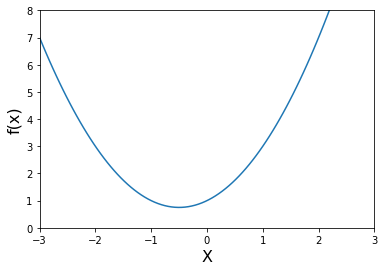

In [4]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

In [5]:
def df(x):
    return 2 * x + 1

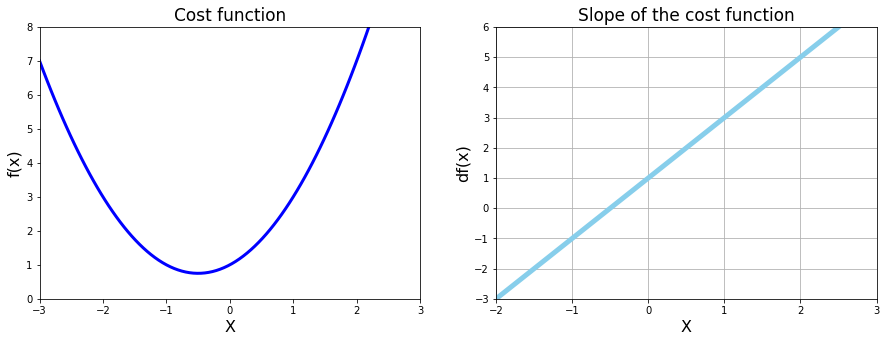

In [6]:
# Plot function and derivative side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
# subplot(no_of_row, no_of_col, index)
plt.subplot(1, 2, 1)

plt.xlim([-3, 3])
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Python Loops & Gradient Descent

In [7]:
# Python For Loop
for n in range(5):
    print('Hello :|', n)
print('Done greeting.')

Hello :| 0
Hello :| 1
Hello :| 2
Hello :| 3
Hello :| 4
Done greeting.


In [8]:
# Python While Loop
counter = 0
while counter < 7:
    print('Counting ...', counter)
    counter = counter + 1
print('Done counting.')

Counting ... 0
Counting ... 1
Counting ... 2
Counting ... 3
Counting ... 4
Counting ... 5
Counting ... 6
Done counting.


In [9]:
# Gradient Descent
new_x = 3 # Starting value
previous_x = 0
step_multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    step_size = abs(new_x - previous_x)
    if step_size < precision:
        print('Loop ran this many times: ', n)
        break
    
print('Local minimum occurs at: ', new_x)
print('Slope of df(x) at this point is: ', df(new_x))
print('f(x) value or cost at this point is: ', f(new_x))

Loop ran this many times:  40
Local minimum occurs at:  -0.49962781616118024
Slope of df(x) at this point is:  0.0007443676776395236
f(x) value or cost at this point is:  0.7500001385208099


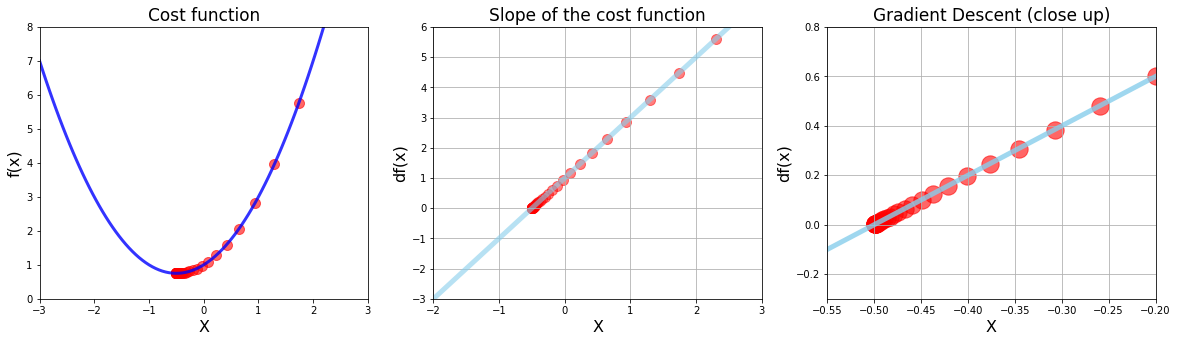

In [10]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim([-3, 3])
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.grid()
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)

plt.show()

## Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [11]:
# Generate second set of data
x_2 = np.linspace(start=-2, stop=2, num=1000)

def g(x):
    return x**4 - 4 * x**2 + 5

def dg(x):
    return 4 * x**3 - 8 * x

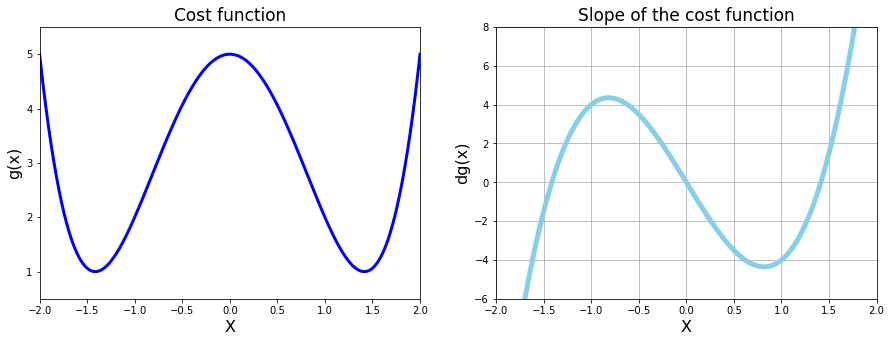

In [12]:
# Plot function and derivative side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
# subplot(no_of_row, no_of_col, index)
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent as a Python Function

In [13]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        step_size = abs(new_x - previous_x)
        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [14]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.5, 
                                                 multiplier=0.02, precision=0.001)
print('Local min occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at:  1.4122375085019094
Number of steps:  23


In [15]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, 
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at:  -1.4137636556157256
Number of steps:  56


In [16]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print('Local min occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at:  -1.4120887490901561
Number of steps:  34


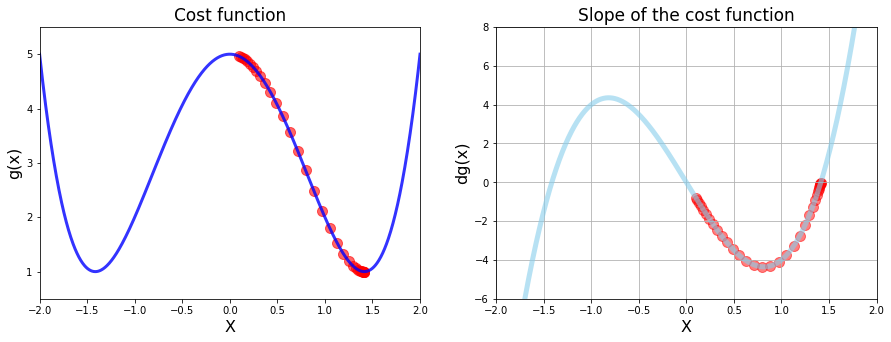

In [17]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.1)

# Plot function, derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
# subplot(no_of_row, no_of_col, index)
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

## Example 3 - Divergence, Overflow and Python Tuples
## $$h(x) = x^5 - 2x^4 + 2$$

In [18]:
# Generate data
x_3 = np.linspace(start=-2.5 , stop=2.5 ,num=1000)

def h(x):
    return x**5 - 2 * x**4 + 2

def dh(x):
    return 5 * x **4 - 8 * x**3

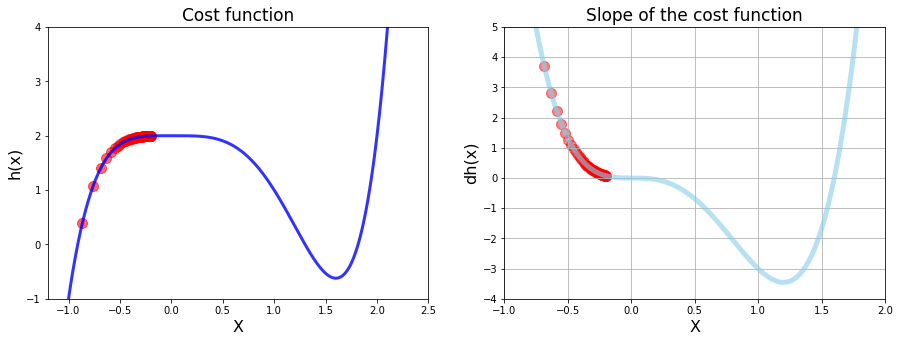

Local min occurs at:  -2071072.4470816324
Cost at this minimum is:  -3.810455326061589e+31
Number of steps:  71


In [19]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, max_iter=70)

# Plot function, derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
# subplot(no_of_row, no_of_col, index)
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)

plt.grid()
plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

In [20]:
import sys

sys.version
type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [21]:
# Creating a tuple - tuple packing
breakfast = 'waffles', 'soy bean', 'eggs'
unlucky_numbers = 13, 4, 9, 26, 17

# Access a value in a tuple
print('I love ', breakfast[0])
print('My hotel has no ' + str(unlucky_numbers[1]) + 'th floor')

# Tuple: use with different types of data, immutable
not_my_address = 1, 'Granville St', 'Vancouver', 45000

tuple_with_single_value = 42,
type(tuple_with_single_value)

main, beverage, protein = breakfast
print('Main course is ' + main)

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is ', data_tuple[0])
print('Cost at the last x value is ', h(data_tuple[0]))
print('Number of steps is ', len(data_tuple[1]))

I love  waffles
My hotel has no 4th floor
Main course is waffles
Local min is  1.5989534547394717
Cost at the last x value is  -0.6214287992331258
Number of steps is  117


## The Learning Rate

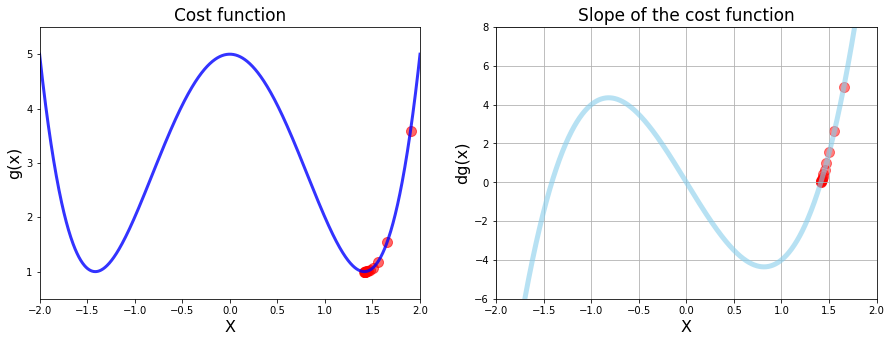

Number of steps:  14


In [22]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                                 multiplier=0.02, max_iter=500)

# Plot function, derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
# subplot(no_of_row, no_of_col, index)
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps: ', len(list_x))

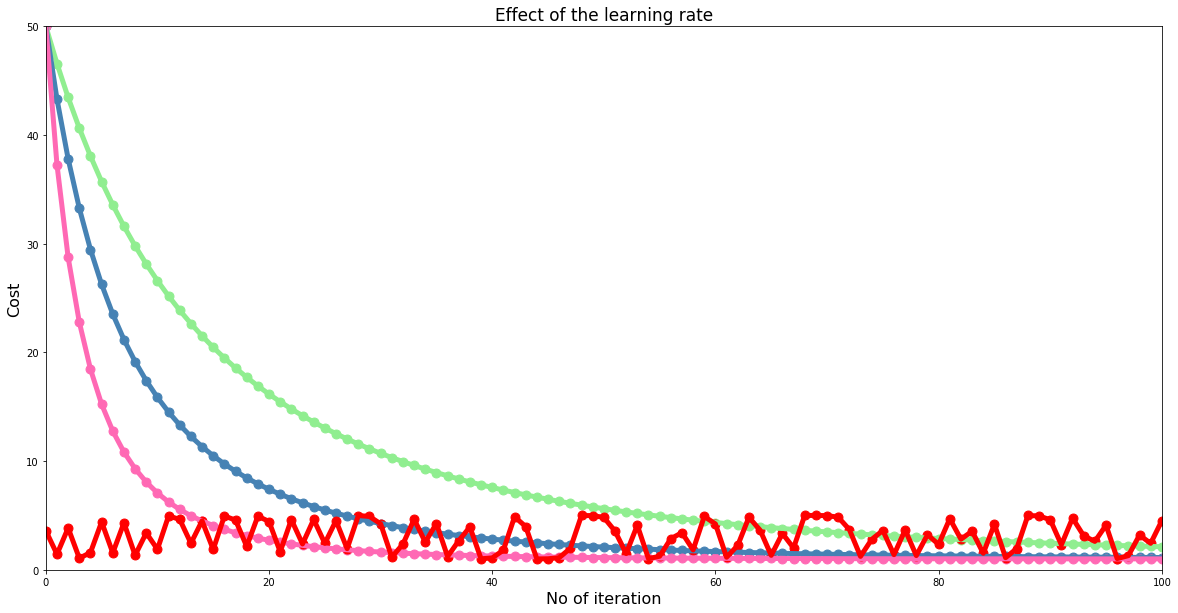

In [23]:
# Run gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                              multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                multiplier=0.25, precision=0.0001, max_iter=n)

# Plot reduction in cost for each iteration
plt.figure(figsize=[20, 10])

# 1 Chart: Low learning rate
plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('No of iteration', fontsize=16)
plt.ylabel('Cost', fontsize=16)

low_values = np.array(low_gamma[1])
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

# Plotting mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', s=80)

# Plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='hotpink', s=80)

# Plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red', s=80)

plt.show()

## Example 4 - Data Visualization with 3D Charts
### Minimize $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimize $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [24]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [25]:
# Generate x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array: ', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array shape after mashgrid: ', x_4.shape)

Shape of X array:  (200,)
Array shape after mashgrid:  (200, 200)


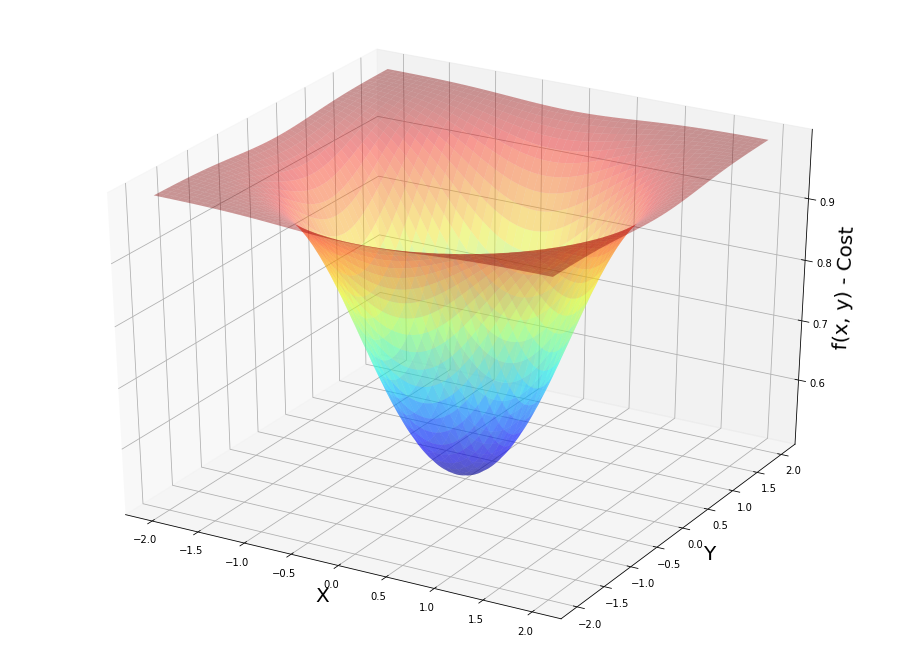

In [26]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.jet, alpha=0.4)

plt.show()

## Partial Derivatives & Symbolic Computation

### $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 -y^2}} {\left(3^{-x^2 - y^2} + 1 \right)^2}$$
### $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 -y^2}} {\left(3^{-x^2 - y^2} + 1 \right)^2}$$

In [27]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is ', f(a, b))
print('Partial derivative wrt x is ', diff(f(a, b), a))
print('Value of f(x, y) at x=1.8 y=1.0 is ', f(a, b).evalf(subs={a:1.8, b:1.0}))
print('Value of df(x, y)/dx at x=1.8 y=1.0 is ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x=1.8 y=1.0 is  0.990604794032582
Value of df(x, y)/dx at x=1.8 y=1.0 is  0.0368089716197505


## Batch Gradient Descent with Sympy

In [28]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array: ', gradients)
print('Minimum occurs at x value of ', params[0])
print('Minimum occurs at y value of ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array:  [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of  3.45838599885832e-11
Minimum occurs at y value of  1.92132555492129e-11
The cost is:  0.500000000000000


In [29]:
# Partial derivative functions Example 4
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return (2 * x * log(3) * r) / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return (2 * y * log(3) * r) / (r + 1)**2

In [30]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess: [x, y]

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array: ', gradients)
print('Minimum occurs at x value of ', params[0])
print('Minimum occurs at y value of ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array:  [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of  3.458385998858304e-11
Minimum occurs at y value of  1.9213255549212797e-11
The cost is:  0.5


## Graphing 3D Gradient Descent and Advanced Numpy Arrays

In [31]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess: [x, y]
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(arr=values_array, values=params.reshape(1, 2), axis=0)
    # values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)
    
# Results
print('Values in gradient array: ', gradients)
print('Minimum occurs at x value of ', params[0])
print('Minimum occurs at y value of ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array:  [0.00046144 0.00025636]
Minimum occurs at x value of  0.0007938985101347202
Minimum occurs at y value of  0.0004410547278526219
The cost is:  0.5000002265349848


In [32]:
# Advanced Numpy Array Practice

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0]: ', hs_band[0])
print('hs_band[0][1]: ', hs_band[0][1])
print('hs_band[1][0]: ', hs_band[1][0])

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

print('Printing nicknames ...', the_roots[:, 0])

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing band roles ...', the_roots[:, 1])

(1, 2)
(2, 2)
hs_band[0]:  ['Black Thought' 'MC']
hs_band[0][1]:  MC
hs_band[1][0]:  Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames ... ['Black Thought' 'Questlove' 'Captain']
Printing band roles ... ['MC' 'Drums' 'Guitar' 'MC']


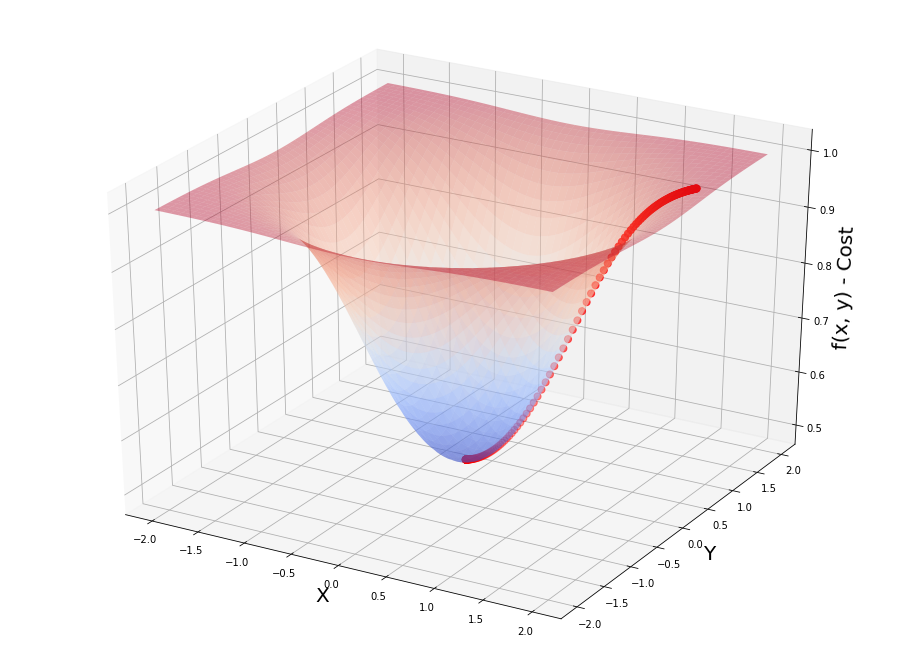

In [33]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], 
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

## Example 5 - Working with Data & A Real Cost Function

### Mean Squared Error : A cost function fore regression problems

#### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [38]:
# Generate sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array: ', x_5.shape)
print('Shape of y_5 array: ', y_5.shape)

Shape of x_5 array:  (7, 1)
Shape of y_5 array:  (7, 1)


In [40]:
# Quick linear regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0: ', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])

Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915


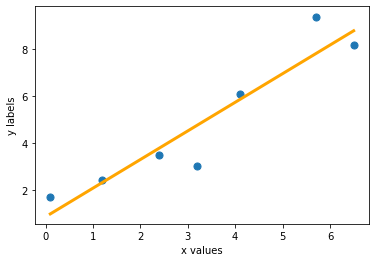

In [41]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y labels')
plt.show()

In [44]:
# y_hat = theta0 + theta1 * x
y_hat = 0.8475351486029536 + 1.2227264637835915 * x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are: \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [54]:
def mse(y, y_hat):
    return sum((y - y_hat)**2) / len(y)

In [57]:
print('Manually calculated MSE is: ', mse(y_5, y_hat))
print('MSE regression using manual calc is: ', mean_squared_error(y_5, y_hat))
print('MSE regression is: ', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is:  [0.94796558]
MSE regression using manual calc is:  0.9479655759794577
MSE regression is:  0.9479655759794577


## 3D Plot for the MSE Cost Function

## Make data for thetas

In [87]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

### Calc MSE using nested for loops

In [88]:
plot_cost = np.zeros((nr_thetas,nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
        plot_cost[i][j] = mse(y_5, y_hat)
        
print('Shape of plot_t0: ', plot_t0.shape)
print('Shape of plot_t1: ', plot_t1.shape)
print('Shape of plot_cost: ', plot_cost.shape)

Shape of plot_t0:  (200, 200)
Shape of plot_t1:  (200, 200)
Shape of plot_cost:  (200, 200)


In [89]:
# Nested loop practice
for i in range(3):
    for j in range(3):
        print(f'value of i is {i}, value of j is {j}')

value of i is 0, value of j is 0
value of i is 0, value of j is 1
value of i is 0, value of j is 2
value of i is 1, value of j is 0
value of i is 1, value of j is 1
value of i is 1, value of j is 2
value of i is 2, value of j is 0
value of i is 2, value of j is 1
value of i is 2, value of j is 2


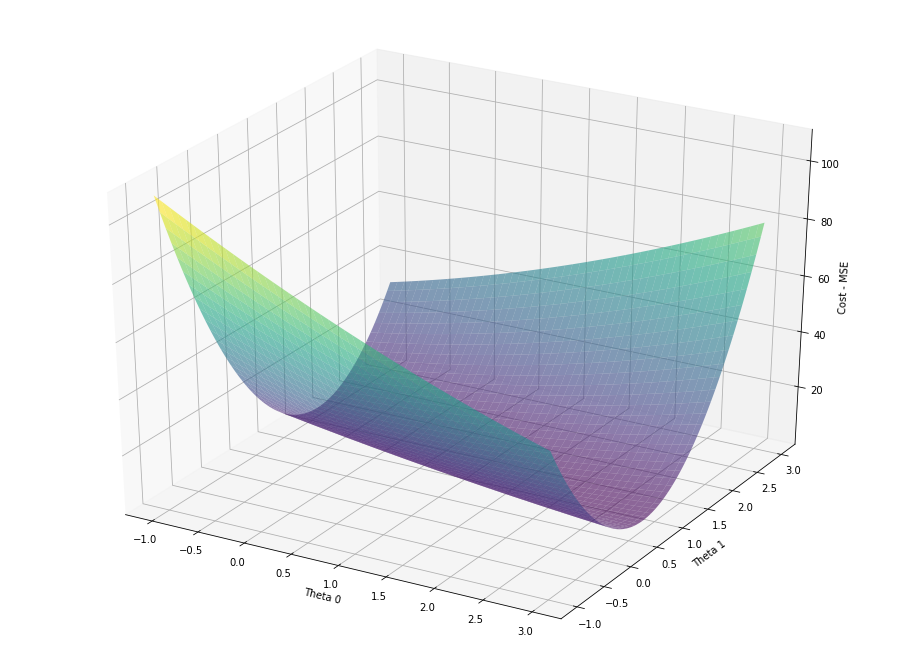

In [97]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=10)
ax.set_ylabel('Theta 1', fontsize=10)
ax.set_zlabel('Cost - MSE', fontsize=10)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.viridis, alpha=0.6)
plt.show()

In [93]:
print('Min value of plot_cost: ', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('min occurs at (i, j): ', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]: ', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]: ', plot_t1[111][91])

Min value of plot_cost:  0.9483826526747164
min occurs at (i, j):  (111, 91)
Min MSE for Theta 0 at plot_t0[111][91]:  0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91]:  1.2311557788944723


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$
## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## MSE & Gradient Descent

In [ ]:
# x values, y values, array of theta parameters (theta0 at index0 and theta1 at index1)
def grad(x, y, thetas):
    n = y.size
    theta0_slope = 
    theta1_slope = 